In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Set the visual style
sns.set_theme(style="whitegrid")

This cell demonstrates how students often first approach data: by isolating categories. While this shows the distribution clearly for each group, it makes comparing the exact survival rate between genders more difficult.

This cell creates two distinct plots side-by-side. While they share a screen, they do not share a single "story" line, making the comparison a manual task for the viewer.

/var/folders/nq/4ryk4j2j7wj_b8q98gml1r_4pwl3t8/T/ipykernel_38864/2389418446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['sex'] == 'male'], x='survived', y='survived',
/var/folders/nq/4ryk4j2j7wj_b8q98gml1r_4pwl3t8/T/ipykernel_38864/2389418446.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['sex'] == 'female'], x='survived', y='survived',


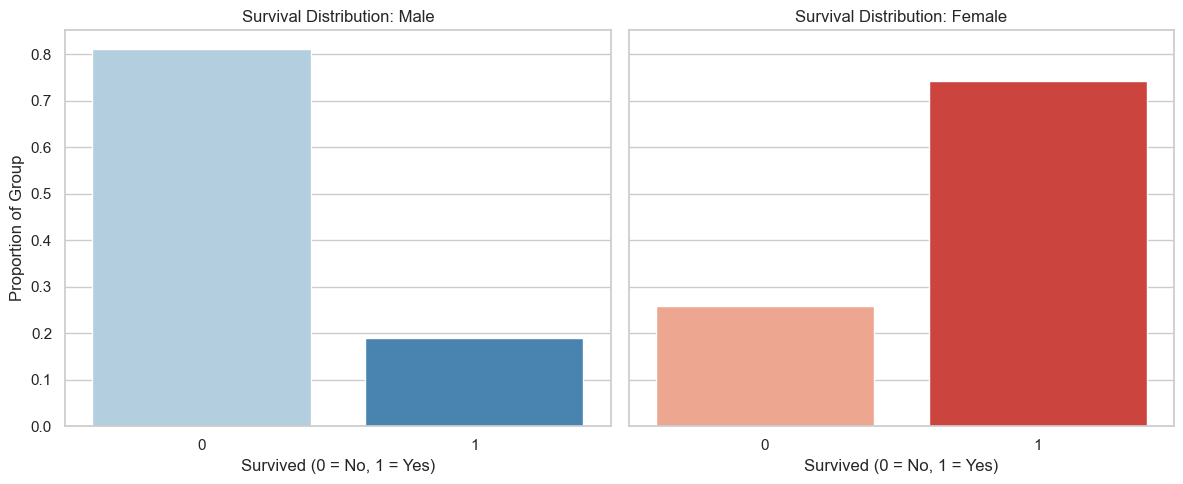

In [9]:
# Cell 2: Survival rates visualized in two completely separate plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for Males
sns.barplot(data=df[df['sex'] == 'male'], x='survived', y='survived', 
            estimator=lambda x: len(x) / len(df[df['sex'] == 'male']), 
            ax=ax1, palette="Blues")
ax1.set_title('Survival Distribution: Male')
ax1.set_xlabel('Survived (0 = No, 1 = Yes)')
ax1.set_ylabel('Proportion of Group')

# Plot for Females
sns.barplot(data=df[df['sex'] == 'female'], x='survived', y='survived', 
            estimator=lambda x: len(x) / len(df[df['sex'] == 'female']), 
            ax=ax2, palette="Reds")
ax2.set_title('Survival Distribution: Female')
ax2.set_xlabel('Survived (0 = No, 1 = Yes)')
ax2.set_ylabel('') # Hide Y label for the second plot to reduce clutter

plt.tight_layout()
plt.show()

/var/folders/nq/4ryk4j2j7wj_b8q98gml1r_4pwl3t8/T/ipykernel_38864/705084581.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sex', y='survived', palette="muted", errorbar=None)


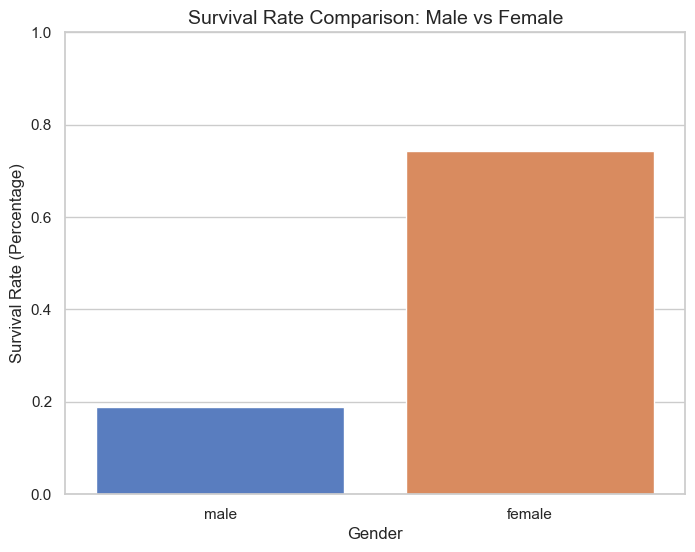

In [3]:
# Cell 3: Survival rates compared in a single plot
plt.figure(figsize=(8, 6))

sns.barplot(data=df, x='sex', y='survived', palette="muted", errorbar=None)

plt.title('Survival Rate Comparison: Male vs Female', fontsize=14)
plt.ylabel('Survival Rate (Percentage)')
plt.xlabel('Gender')
plt.ylim(0, 1) # Keeps the scale consistent for comparison

plt.show()

Violin plots are arguably the most powerful way to show the "Women and Children First" trend. They combine a box plot with a Kernel Density Estimate (KDE), showing where the "bulk" of the population lies.

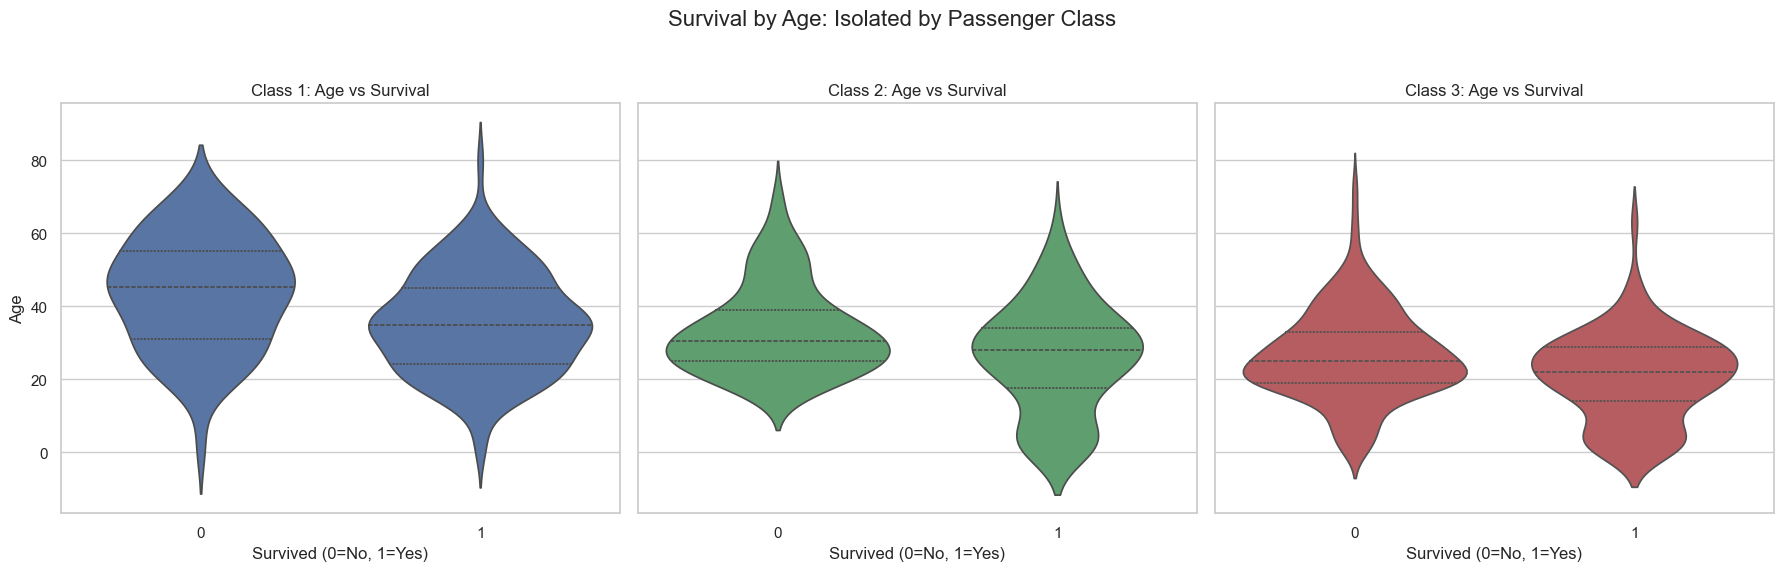

In [4]:
# Cell 4: Age and Survival separated by Class
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

classes = [1, 2, 3]
colors = ["#4C72B0", "#55A868", "#C44E52"]

for i, pclass in enumerate(classes):
    subset = df[df['pclass'] == pclass]
    sns.violinplot(data=subset, x='survived', y='age', ax=axes[i], color=colors[i], inner="quart")
    axes[i].set_title(f'Class {pclass}: Age vs Survival')
    axes[i].set_xlabel('Survived (0=No, 1=Yes)')
    axes[i].set_ylabel('Age' if i == 0 else '')

plt.suptitle('Survival by Age: Isolated by Passenger Class', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

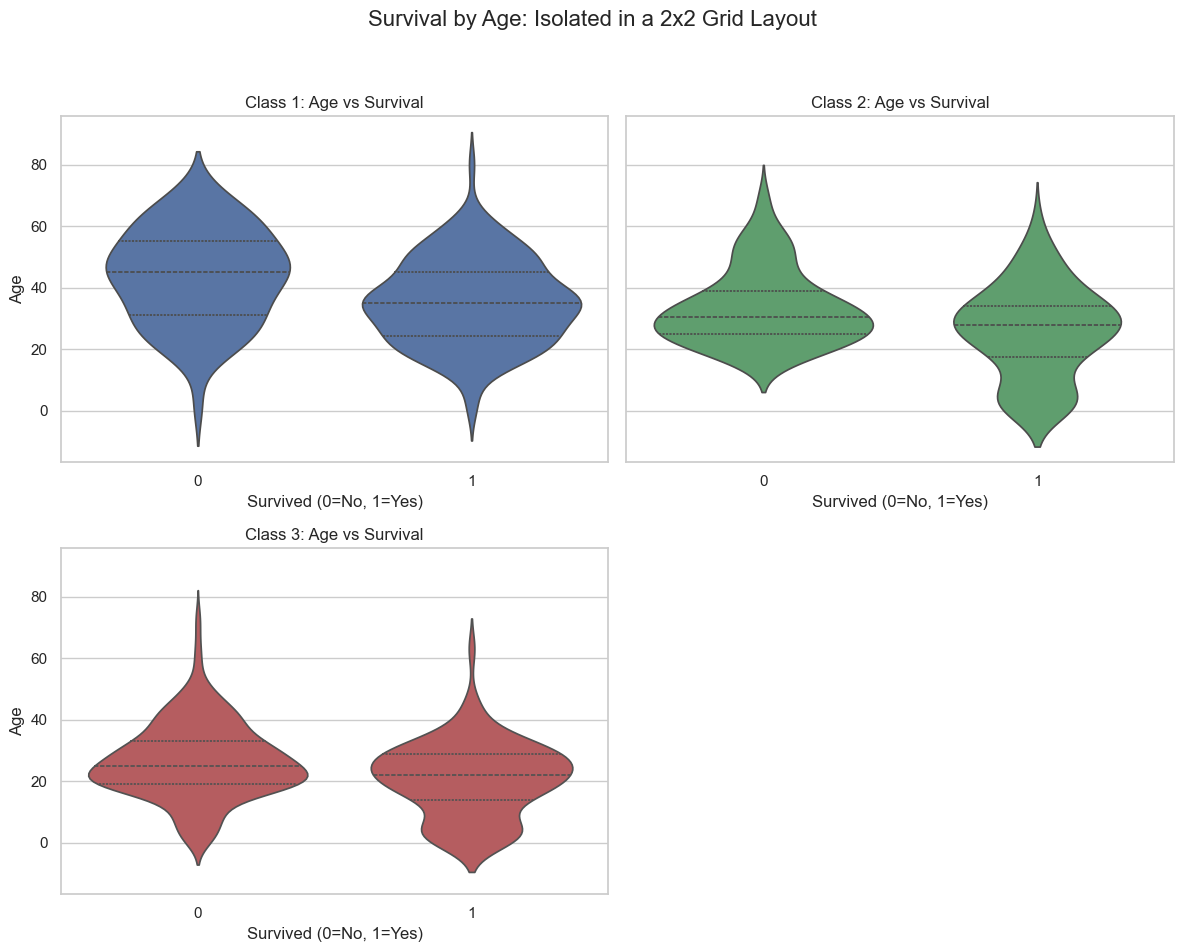

In [5]:
# Cell 4a: Age and Survival separated into a 2x2 Grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

classes = [1, 2, 3]
colors = ["#4C72B0", "#55A868", "#C44E52"]

# Flatten the 2x2 axes array so we can iterate through it easily
axes_flat = axes.flatten()

for i, pclass in enumerate(classes):
    subset = df[df['pclass'] == pclass]
    sns.violinplot(data=subset, x='survived', y='age', ax=axes_flat[i], color=colors[i], inner="quart")
    axes_flat[i].set_title(f'Class {pclass}: Age vs Survival')
    axes_flat[i].set_xlabel('Survived (0=No, 1=Yes)')
    axes_flat[i].set_ylabel('Age')

# Hide the 4th (empty) subplot
axes_flat[3].axis('off')

plt.suptitle('Survival by Age: Isolated in a 2x2 Grid Layout', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

If you want to show a "trend" of survival over a continuous variable like age, a overlapping KDE plot is much cleaner than a histogram. It turns "noisy" data into smooth "waves."

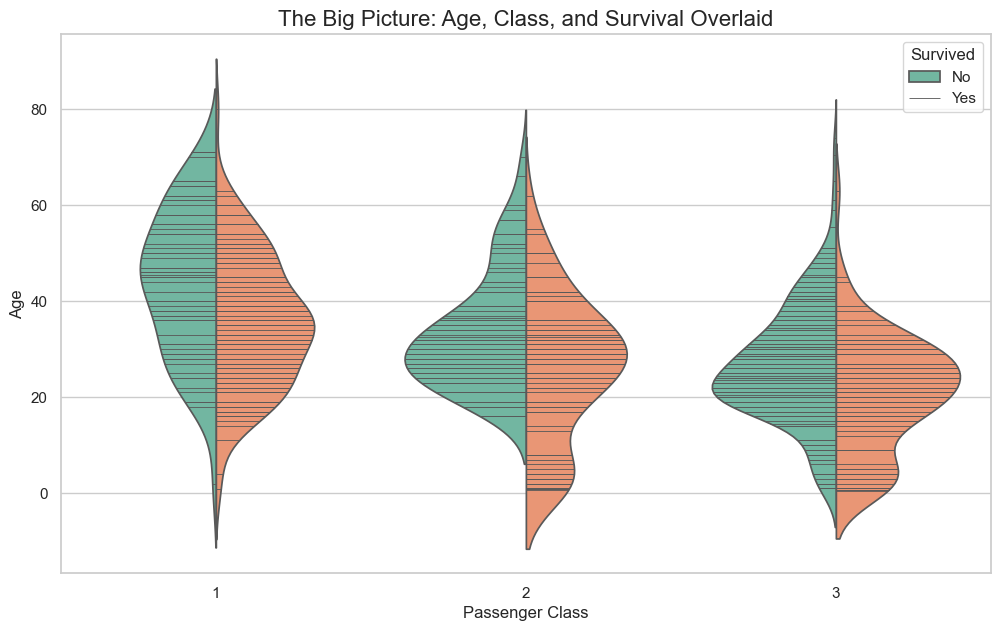

In [6]:
# Cell 5: The Overlaid Comparison
plt.figure(figsize=(12, 7))

# We use 'split=True' to put Survived/Perished side-by-side for each class
sns.violinplot(data=df, x='pclass', y='age', hue='survived', 
               split=True, inner="stick", palette="Set2")

plt.title('The Big Picture: Age, Class, and Survival Overlaid', fontsize=16)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

plt.show()

A heatmap shows which features (like fare or pclass) have the strongest relationship with survived.

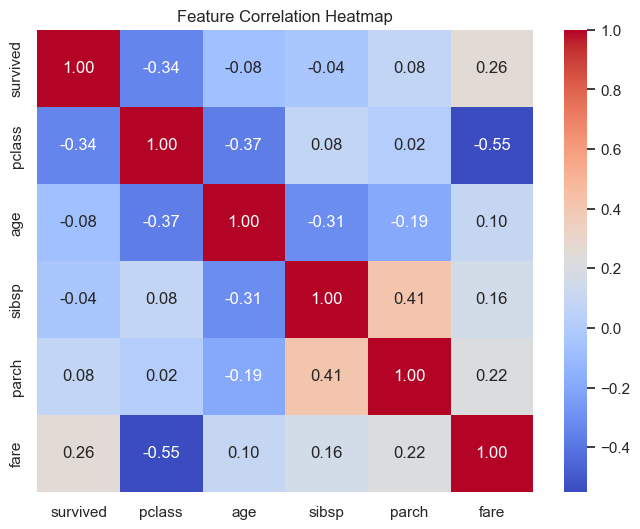

In [7]:
# Cell 6: Correlation Heatmap
plt.figure(figsize=(8, 6))

# Note: We only correlate numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')
plt.show()

A Mosaic Plot is one of the best ways to show the relationship between multiple categorical variables (like Class, Gender, and Survival) simultaneously. The area of each rectangle represents the frequency of that group.

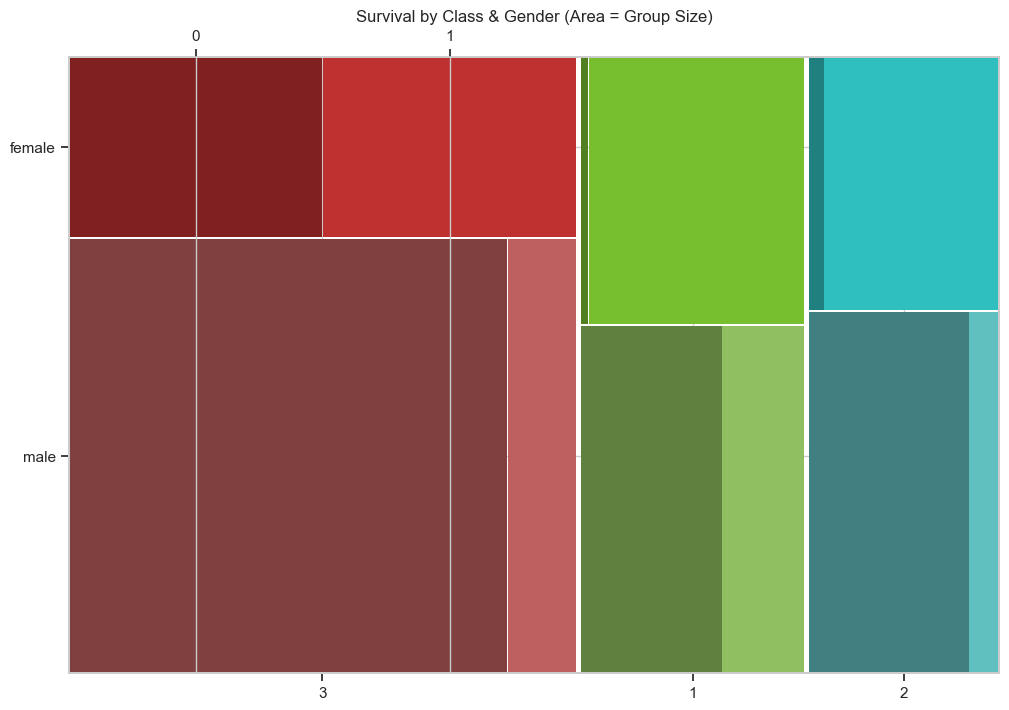

In [8]:
from statsmodels.graphics.mosaicplot import mosaic

# Cell 6: Mosaic Plot - Visualizing 3 Categories at once
plt.rc('figure', figsize=(12, 8))

# This shows the intersection of Class, Sex, and Survival
labelizer = lambda k: "" # Cleans up labels for visual clarity
mosaic(df, ['pclass', 'sex', 'survived'], title='Survival by Class & Gender (Area = Group Size)', 
       labelizer=labelizer, axes_label=True)

plt.show()